# Comprehensive Analysis into the Artificial Intelligence and Machine Learning Job Market 

#### About the Dataset

<a href="https://www.kaggle.com/datasets/abhaykumar2812/ai-and-ml-jobs">AI and ML Jobs</a>: This dataset has details regarding various jobs in the fields of AI/ML and Data Science. Additionally, it contains the job descriptions and key skills needed to apply for a particular role.

# 0. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import ast  # To safely evaluate string literals as Python expressions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from gensim import corpora
from gensim.models.ldamodel import LdaModel
pd.set_option('display.max_columns', None)
# pip install scikit-learn nltk
# pip install scikit-learn gensim

<br>

# 1. Exploratory analysis

In [2]:
df = pd.read_csv('AI and ML Jobs.csv')

In [3]:
df.head()

,Title,Company,Location,Type of Positions,Job Description,Salary,Identified_Skills
0,"Staff Applied Scientist, Marketplace",ThredUp Inc.,CA,Full-time,\nAbout thredUP thredUP is transforming resale...,190000.0,"['python', 'machine learning', 'aws', 'sql']"
1,Prompt Engineer for Generative AI (chatbot and...,Vicarious Talent Agency,WA,Full-time,"We are Vicarious, a talent agency that represe...",70000.0,"['python', 'machine learning', 'deep learning'..."
2,Data Systems Analyst/Architect,General Dynamics Information Technology,Remote,Full-time,Clearance Level None Category Data Science Loc...,104000.0,"['machine learning', 'aws', 'azure', 'nosql', ..."
3,AIOps Principle Data Scientist,CVS Health,CT,Full-time,\nBring your heart to CVS Health. Every one of...,140000.0,"['python', 'machine learning', 'aws', 'gcp']"
4,Sr. Data Scientist,Altak Group,Remote,Full-time,Job Summary:\nWe are seeking an experienced Da...,136000.0,"['python', 'machine learning', 'tableau', 'aws..."


Interpretation:
- Convert columns to lowercase
- Remove "\n" from "Job Description"
- Identified_skills will be one-hot encoded for modeling

In [4]:
df.shape

(692, 7)

In [5]:
# Check for NaN values
df.isna().sum()

Title                0
Company              0
Location             0
Type of Positions    0
Job Description      0
Salary               0
Identified_Skills    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              692 non-null    object 
 1   Company            692 non-null    object 
 2   Location           692 non-null    object 
 3   Type of Positions  692 non-null    object 
 4   Job Description    692 non-null    object 
 5   Salary             692 non-null    float64
 6   Identified_Skills  692 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.0+ KB


In [7]:
# Determine how many job descriptions are duplicate postings within the data
duplicate_count = df['Job Description'].duplicated().sum()
print(duplicate_count)

422


In [8]:
# Drop the duplicate job posts
df = df.drop_duplicates('Job Description')

In [9]:
# Get updated dataframe shape
df.shape

(270, 7)

## 1.1 Functions to explore features

In [10]:
# function to create display general information about the feature
def gen_info_feat(df,feature):
    match feature.lower().replace(' ', '_'):
        case 'title' | 'company' | 'location' | 'type_of_positions' | 'job_description'| 'salary' | 'identified_skills':
            # change the feature to be express in positive numbers days
            print('Description:\n{}'.format((df[feature]).describe()))
            print('*'*50)
            print('Object type: {}'.format(df[feature].dtype))

In [11]:
#Function that will return the value count and frequency of each observation within a feature
def value_cnt_norm_cal(df,feature):
    ftr_value_cnt = df[feature].value_counts()
    ftr_value_cnt_norm = df[feature].value_counts(normalize=True) * 100
    ftr_value_cnt_concat = pd.concat([ftr_value_cnt, ftr_value_cnt_norm], axis=1)
    ftr_value_cnt_concat.columns = ['Count', 'Frequency (%)']
    return ftr_value_cnt_concat

In [12]:
# Function to create a bar chart plot
def create_bar_plot(df,feature):
    match feature.lower().replace(' ', '_'):
        case 'title' | 'company' | 'location' | 'idetified_skills':
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.barplot(x=value_cnt_norm_cal(df,feature).head(10).index,y=value_cnt_norm_cal(df,feature).head(10).values[:,0])
            plt.xlabel('{}'.format(feature).capitalize())
            plt.xticks(rotation=45)
            plt.ylabel('Count')
            plt.title('{} count (Top 10)'.format(feature))
            return plt.show()
        case 'type_of_positions':
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
            plt.xlabel('{}'.format(feature).capitalize())
            plt.ylabel('Count')
            plt.title('{} count'.format(feature))
            return plt.show()
        case 'title_clean':
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.barplot(x=value_cnt_norm_cal(df,feature).index,y=value_cnt_norm_cal(df,feature).values[:,0])
            plt.xlabel('{}'.format(feature).capitalize())
            plt.xticks(rotation=45)
            plt.ylabel('Count')
            plt.title('{} count'.format(feature))
            return plt.show()

In [13]:
# Function to create a histogram plot
def create_hist_plot(df,feature, bins=10):
    match feature.lower():
        case 'salary':
            fig, ax = plt.subplots(figsize=(10, 6))
            sns.histplot(np.abs(df[feature]),bins=bins,kde=True)
            plt.title('{} distribution'.format(feature))
            return plt.show()

In [14]:
# Function to create a box plot
def create_box_plot(df,feature):
    match feature.lower():
        case 'salary':
            fig, ax = plt.subplots(figsize=(2,8))
            sns.boxplot(y=df[feature])
            plt.title('{} distribution(Boxplot)'.format(feature))
            return plt.show()

In [15]:
# Function to create a distribution of skills
def create_skills_dist_plot(df, skills):
    skills_distribution = df[skills].sum().sort_values(ascending=False)
    # Plot the skills distribution
    plt.figure(figsize=(10, 6))
    skills_distribution.plot(kind='bar')
    plt.title('Distribution of Requested Skills')
    plt.xlabel('Requested Skills')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    plt.show()

In [16]:
# Function that creates a bar plot showing the average salary for each category in the specified categorical feature.
def categorical_vs_salary_barplot(df, categorical_feature):
    # Calculate the mean salary for each category
    salary_means = df.groupby(categorical_feature)['salary'].mean().sort_values(ascending=False)
    
    # Limit to top 10 categories
    top_10_salary_means = salary_means.head(10)
    
    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_10_salary_means.index, y=top_10_salary_means.values)
    
    # Customize the plot
    plt.title(f'Average Salary by {categorical_feature.capitalize()}')
    plt.xlabel(categorical_feature.capitalize())
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [17]:
# Function that filters the top N skills that are most correlated with salary
def plot_top_skills_salary_correlation(df, skills, target_feature='salary', top_n=10):
    # Select the columns of interest (skills + salary)
    df_corr = df[skills + [target_feature]]
    
    # Calculate the correlation matrix
    corr_matrix = df_corr.corr()
    
    # Extract the correlation of skills with the target column (salary)
    salary_corr = corr_matrix[target_feature].drop(target_feature).sort_values(ascending=False)
    
    # Filter the top N skills
    top_skills = salary_corr.head(top_n).index
    
    # Create a correlation matrix for the top N skills
    top_skills_corr_matrix = df_corr[top_skills.tolist() + [target_feature]].corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(top_skills_corr_matrix, annot=True, cmap='coolwarm', cbar=True, center=0, vmin=-1, vmax=1)
    
    # Customize the plot
    plt.title(f'Correlation of Top {top_n} skills correlated with {target_feature.capitalize()}')
    plt.xlabel('Skills')
    plt.ylabel('Skills/Salary')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

## 1.2 Univariate analysis

### 1.2.1 Title

In [18]:
gen_info_feat(df, 'Title')

Description:
count                270
unique               212
top       Data Scientist
freq                  31
Name: Title, dtype: object
**************************************************
Object type: object


In [19]:
# Function that prints out title and title instances
def print_series(df, column_name='Title'):
    title_counts = df[column_name].value_counts()
    
    for title, count in title_counts.items():
        print(f'{title} - {count}')
        print("-" * 50)

In [20]:
# Function that prints out title and title instances
def print_series(df, column_name='Title'):
    title_counts = df[column_name].value_counts()
    
    for title, count in title_counts.items():
        print(f'{title} - {count}')
        print("-" * 50)

Interpretation:
- There is no clear distinction among titles and many of the job postings introduce unnecessary characters or information that is hyperspecific for the specific post.
- The text will require tokenization, punctuation, and stop word removal

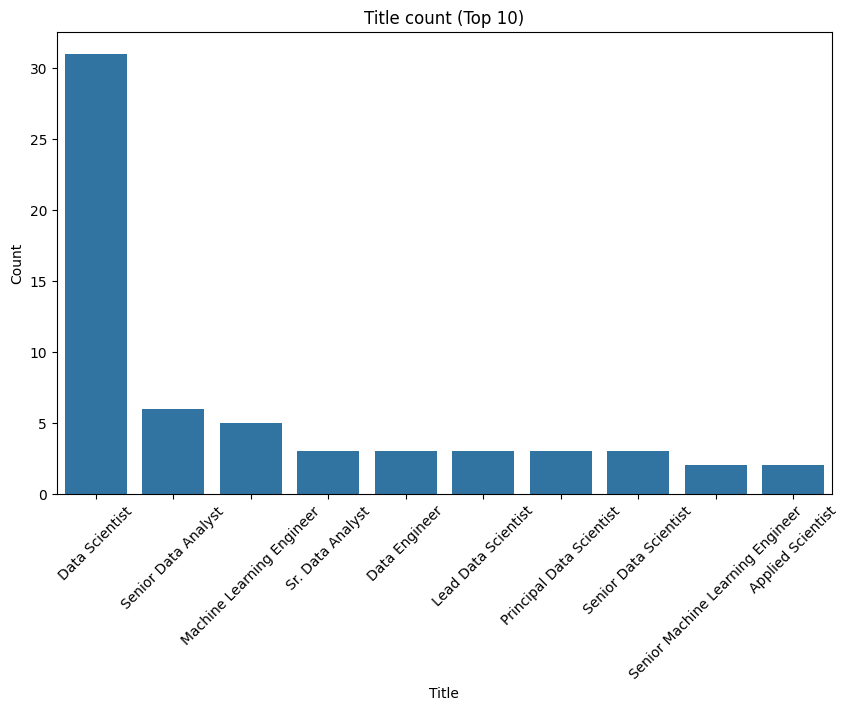

In [21]:
create_bar_plot(df, 'Title')

### 1.2.2 Company

In [22]:
gen_info_feat(df, 'Company')

Description:
count                     270
unique                    207
top       Booz Allen Hamilton
freq                       18
Name: Company, dtype: object
**************************************************
Object type: object


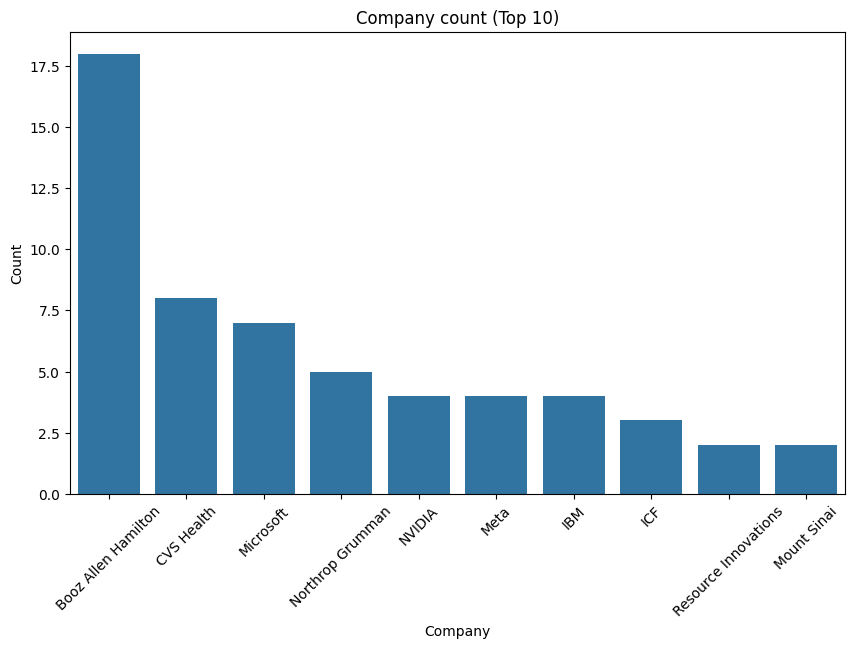

In [23]:
create_bar_plot(df, 'Company')

### 1.2.3 Location

In [24]:
gen_info_feat(df, 'Location')

Description:
count     270
unique     32
top        CA
freq       54
Name: Location, dtype: object
**************************************************
Object type: object


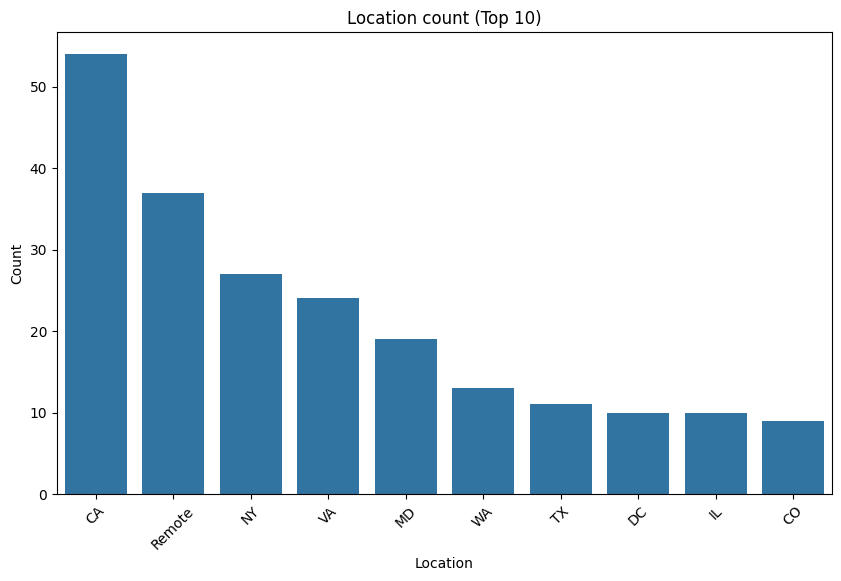

In [25]:
create_bar_plot(df, 'Location')

### 1.2.4 Type of Positions

In [26]:
gen_info_feat(df, 'Type of Positions')

Description:
count           270
unique            1
top       Full-time
freq            270
Name: Type of Positions, dtype: object
**************************************************
Object type: object


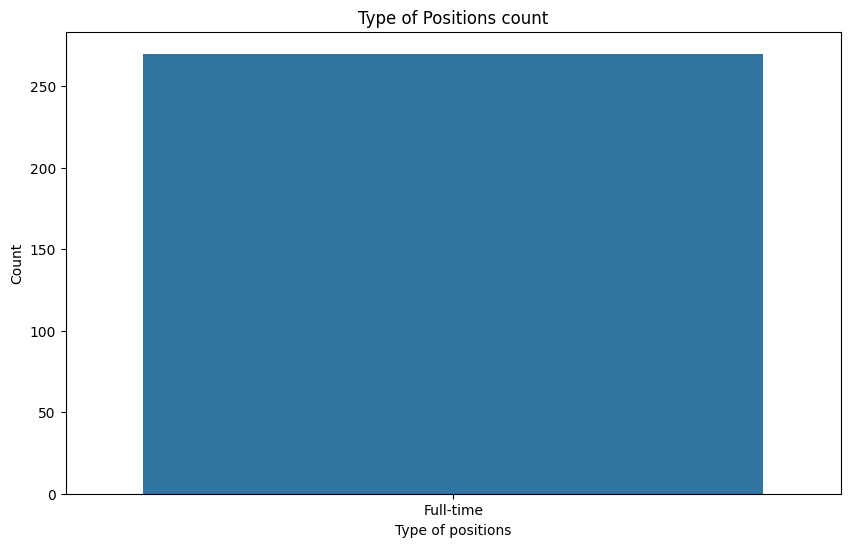

In [27]:
create_bar_plot(df, 'Type of Positions')

### 1.2.5 Job Description

In [28]:
gen_info_feat(df, 'Job Description')

Description:
count                                                   270
unique                                                  270
top       \nAbout thredUP thredUP is transforming resale...
freq                                                      1
Name: Job Description, dtype: object
**************************************************
Object type: object


### 1.2.6 Salary

In [29]:
gen_info_feat(df, 'Salary')

Description:
count       270.000000
mean     110951.440741
std       41720.875398
min        4145.000000
25%       80000.000000
50%      106254.500000
75%      136750.000000
max      268000.000000
Name: Salary, dtype: float64
**************************************************
Object type: float64


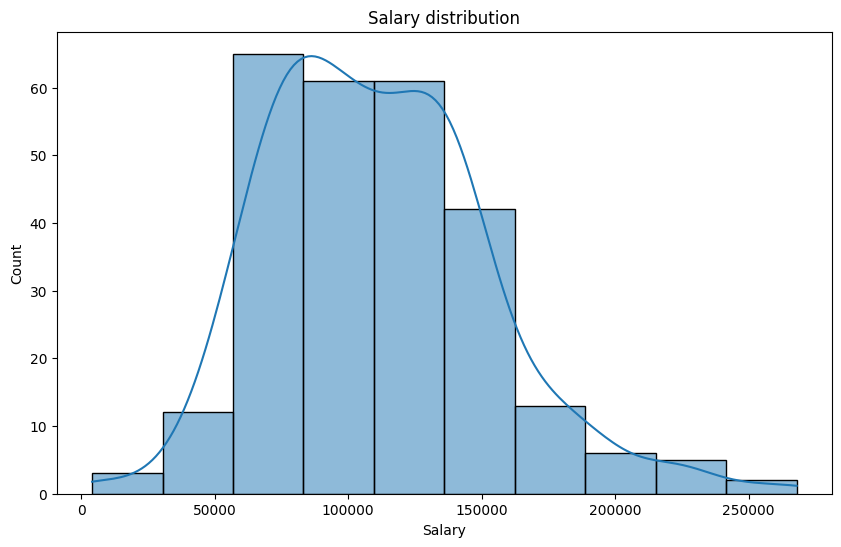

In [30]:
create_hist_plot(df, 'Salary')

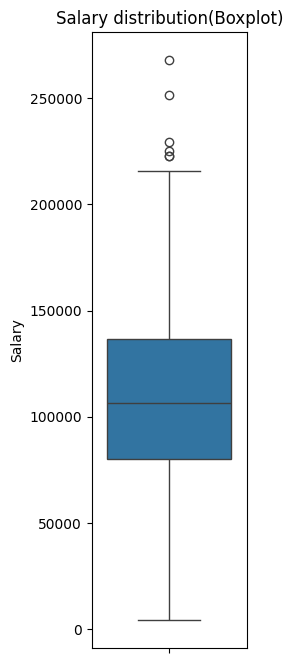

In [31]:
create_box_plot(df, 'Salary')

Interpretation:
- Address outliers that will have an impact on statistical interpretation

### 1.2.7 Identified Skills

In [32]:
gen_info_feat(df, 'Identified_Skills')

Description:
count     270
unique    132
top        []
freq       40
Name: Identified_Skills, dtype: object
**************************************************
Object type: object


In [33]:
# Identify rows where 'Identified_Skills' is an empty list
no_identified_skills = df[df['Identified_Skills'].apply(lambda x: len(x) == 2)]
print(no_identified_skills.shape)  # Check the shape of the filtered DataFrame

(40, 7)


In [34]:
create_bar_plot(df, 'Identified_Skills')

Interpretation:
- 40 job postings did not include skills data 
- Can either remove instances from data or consider NLP techniques to autofill based on other title's respective skills
- For this instance, the rows will be removed

<br>

# 2. Data Cleaning

## 2.1 Process empty Identified Skills

In [35]:
# Remove rows with empty 'Identified_Skills'
df = df[~df['Identified_Skills'].apply(lambda x: len(x) == 2)]

## 2.2 Remove \n from Job Description

In [37]:
# Remove '\n' from the job description column
df['Job Description'] = df['Job Description'].str.replace('\n', '')

## 2.3 Convert column titles to lowercase and format to Snake case

In [38]:
# Convert columns to lowercase for consistency and compatibility
df.columns = df.columns.str.lower().str.replace(' ', '_')

## 2.4 Remove Salary outliers

In [39]:
gen_info_feat(df, 'salary')

Description:
count       230.000000
mean     114154.056522
std       40977.015267
min        7315.000000
25%       80906.000000
50%      111000.000000
75%      138202.000000
max      268000.000000
Name: salary, dtype: float64
**************************************************
Object type: float64


In [40]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering the DataFrame to remove outliers
    filtered_df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound) & (df[feature] >=37429)]
    
    return filtered_df

In [41]:
# Applying the function to 'salary'
df = remove_outliers_iqr(df, 'salary')

<br>

# 3. Feature Engineering

## 3.1 Convert Identified Skills to binary columns

In [42]:
# Create an independent copy of original dataframe to avoid 'SettingWithCopyWarning'
df = df.copy()

# Convert string representations of lists to actual lists
df['identified_skills'] = df['identified_skills'].apply(ast.literal_eval)

# Identify all unique skills across the dataset
unique_skills = set(skill for sublist in df['identified_skills'] for skill in sublist)

# Initialize columns for each skill with default value 0
for skill in unique_skills:
    df.loc[:, skill] = 0  # Using .loc to avoid the SettingWithCopyWarning

# Populate the binary columns based on skills presence
for index, row in df.iterrows():
    for skill in row['identified_skills']:
        if skill in unique_skills:
            df.at[index, skill] = 1  # .at is efficient for single value assignment

## 3.2 Title tokenization and punctuation/stop words removal

In [43]:
# Function used to tokenize text and remove punctuation and stop words
def preprocess_text(text):
    # Tokenize text and remove punctuation
    tokens = word_tokenize(text.translate(str.maketrans('', '', string.punctuation)))
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Rejoin tokens into a string
    return ' '.join(tokens)

## 3.3 Process titles

In [44]:
# Assuming df is your DataFrame and it has a column 'title' with job titles
df['preprocessed_title'] = df['title'].apply(preprocess_text)

<br>

# 4. Clean Titles with Natural Language Processing (NLP)

## 4.1 Transform titles into a TF-IDF matrix

In [45]:
# Create a custom vocab for the vectorizer to emphasize
custom_vocabulary = ['sr', 'senior', 'junior', 'data', 'scientist', 'analyst', 'engineer', 'ai', 'statistician']

# Initialize and fit the TF-IDF vectorizer
vectorizer = TfidfVectorizer(vocabulary=custom_vocabulary, ngram_range=(1, 3), stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_title'])

## 4.2 Determine most efficient cluster count

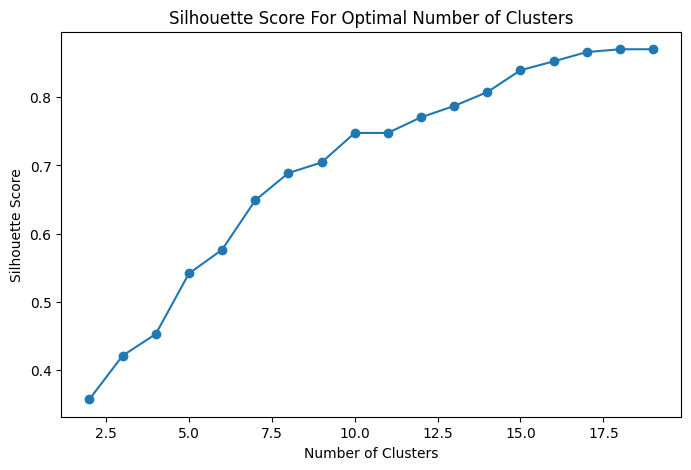

In [46]:
# List to store inertia values for different numbers of clusters
silhouette_scores = []

# Create cluster range
range_clusters = range(2, 20)

# Iterate through clusters retrieving each silhouette score
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(tfidf_matrix)
    score = silhouette_score(tfidf_matrix, clusters)
    silhouette_scores.append(score)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal Number of Clusters')
plt.show()

## 4.3 Create the clusters with K-Means

In [47]:
# Cluster the job titles
num_clusters = 17
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add clusters to original dataframe
df['cluster'] = clusters

# Evaluate clustering performance
score = round(silhouette_score(tfidf_matrix, clusters), 2)
print("Silhouette Score: ", score)

Silhouette Score:  0.87


## 4.4 Reduce dimensionality of the TF-IDF matrix with t-SNE

In [48]:
# Initialize the t-SNE algorithm for dimensionality reduction and transform matrix
tsne = TSNE(n_components=2, random_state=42)
reduced_tfidf_matrix = tsne.fit_transform(tfidf_matrix.toarray())

## 4.5 Cluster visualization

In [49]:
# Create temporary dataframe to visualize clusters
df_reduced = pd.DataFrame(reduced_tfidf_matrix, columns=['Dim1', 'Dim2'])
df_reduced['Cluster'] = clusters

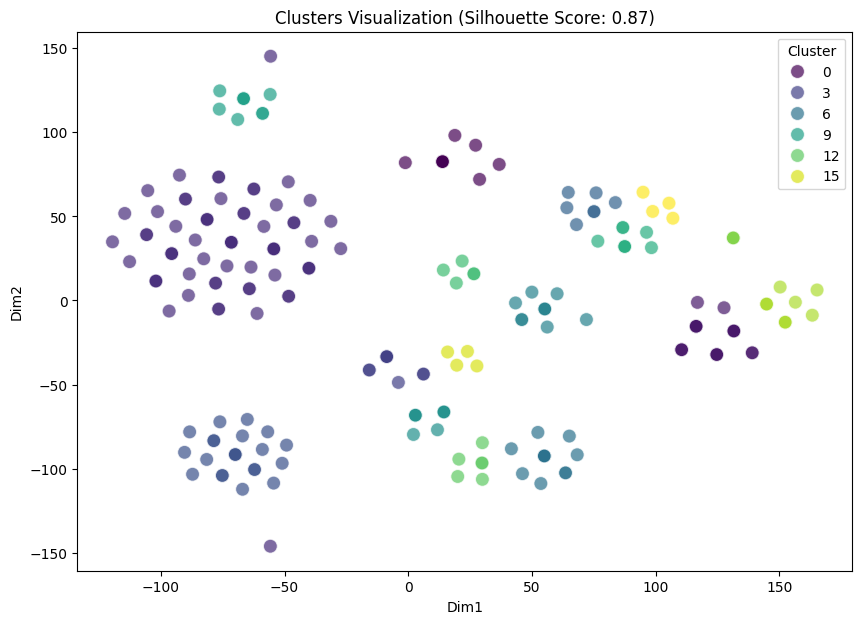

In [50]:
# Plot clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_reduced, x='Dim1', y='Dim2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title(f'Clusters Visualization (Silhouette Score: {score})')
plt.show()

## 4.6 Analyze cluster titles to determine labels

In [51]:
# Print titles in each cluster to review them
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['title'].unique())
    print("\n")

Cluster 0:
['Senior Data Scientist, 5+ Years of Experience'
 'Senior Principal Data Scientist (Melbourne FL)'
 'Senior Data Scientist, Pricing' 'Senior Manager, Data Science'
 'Senior Data Scientist' 'Senior Data Scientist - 2199648'
 'Senior Applied Scientist'
 'Senior Spatial Data Scientist (Active TS/SCI required)'
 'Senior, Data Scientist, People.AI'
 'Senior Data Scientist (Epi3) DOH7657' 'Senior Statistical Modeler'
 'Data Scientist or Senior Data Scientist'
 'Senior Decision Scientist - Network Configuration Product']


Cluster 1:
['Artificial Intelligence Engineer' 'Principal AI/ML Engineer'
 'Staff Machine Learning Engineer - Personalization'
 'Software Engineer, Machine Learning'
 'Machine Learning Engineer (Entry Level)' 'Machine Learning Engineer'
 'Principal Machine Learning Engineer - Motion Planning'
 'AI/ML Engineer II' 'AI/ML Engineer' 'ML Engineer (Entry Level)'
 'Machine Learning Engineer II - Java Development'
 'AI/ML Packaging Engineer'
 'Associate Machine Learning

## 4.8 Label clusters based on titles

In [52]:
topic_labels = {
    0: "Sr. Data Scientist",
    1: "AI/ML Engineer",
    2: "Data Scientist",
    3: "Sr. Data Scientist",
    4: "Data Science Director",
    5: "AI/ML Engineer",
    6: "Sr. Data Analyst",
    7: "AI/ML Engineer",
    8: "Sr. Data Analyst",
    9: "Applied Scientist",
    10: "AI/ML Engineer",
    11: "Statistician",
    12: "Data Analyst",
    13: "AI/ML Engineer",
    14: "Data Engineer",
    15: "Sr. Data Engineer",
    16: "AI/ML Engineer"
}

# Apply the labels to your dataframe
df['title_clean'] = df['cluster'].map(topic_labels)

## 4.9 Update title_clean position and drop unnecessary columns

In [53]:
# Convert columns to a list
df_cols = df.columns.tolist()

# Remove 'title_clean' from the list
df_cols.remove('title_clean')

# Insert 'title_clean' in the 1th position
df_cols.insert(1, 'title_clean')

# Columns to drop
drop_columns = ['preprocessed_title', 'cluster']

# Reorder dataframe and drop 'preprocessed_title'
df = df[df_cols].drop(drop_columns, axis=1)

## 4.10 Save processed dataframe to csv

In [54]:
df.to_csv('ai_ml_jobs_clean.csv')

<br>

# 5. EDA on updated dataset

## 5.1 Univariate Analysis

### 5.1.1 Title (Clean)

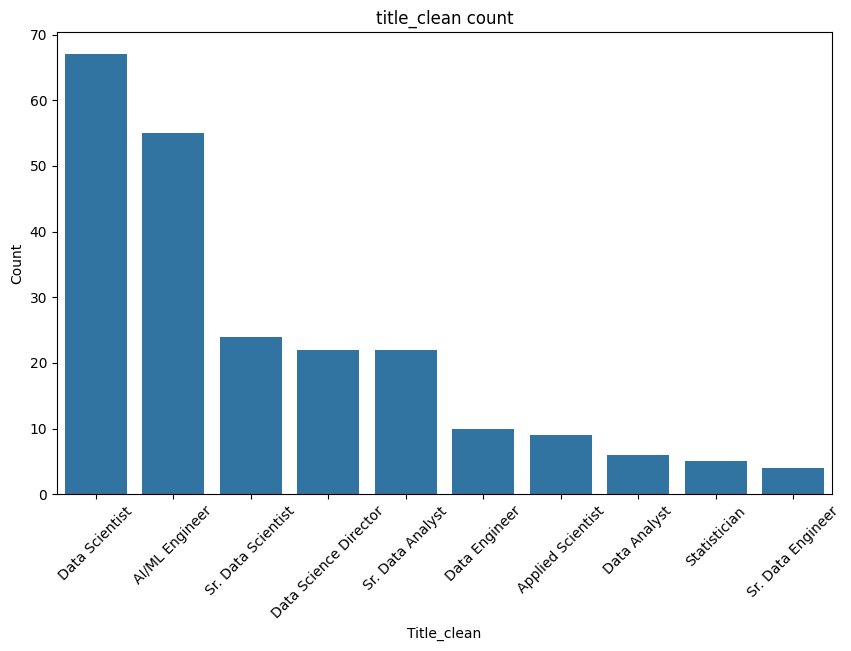

In [55]:
create_bar_plot(df, 'title_clean')

### 5.1.2 Salary

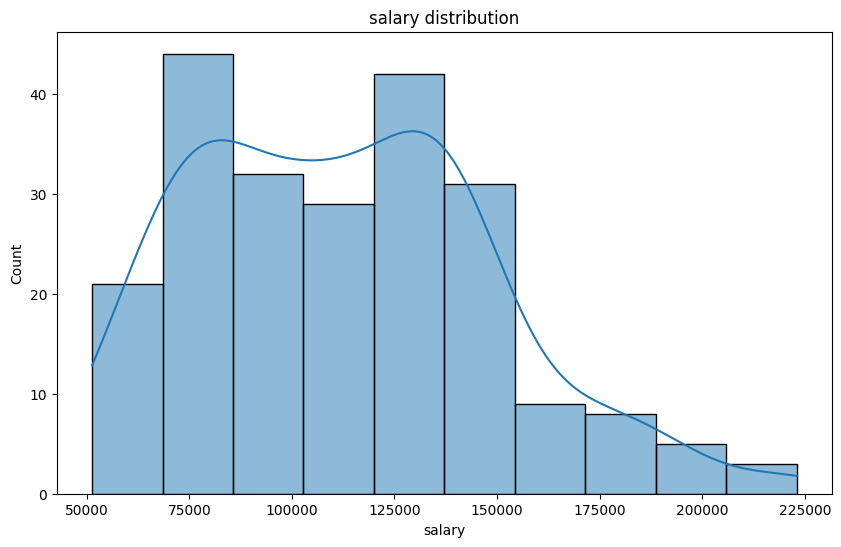

In [56]:
create_hist_plot(df, 'salary')

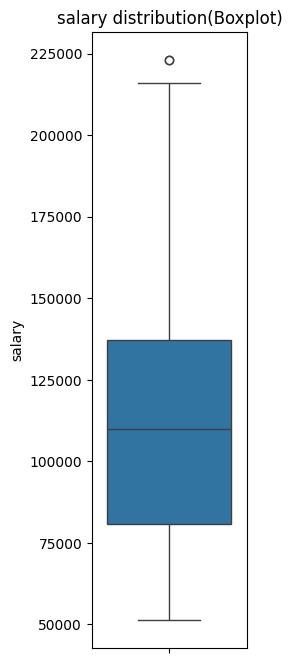

In [57]:
create_box_plot(df, 'salary')

### 5.1.3 Skills

In [58]:
# Select all int64 values for visualization
skills = df.select_dtypes('int64')

# Convert columns to list
skills_list = skills.columns.tolist()

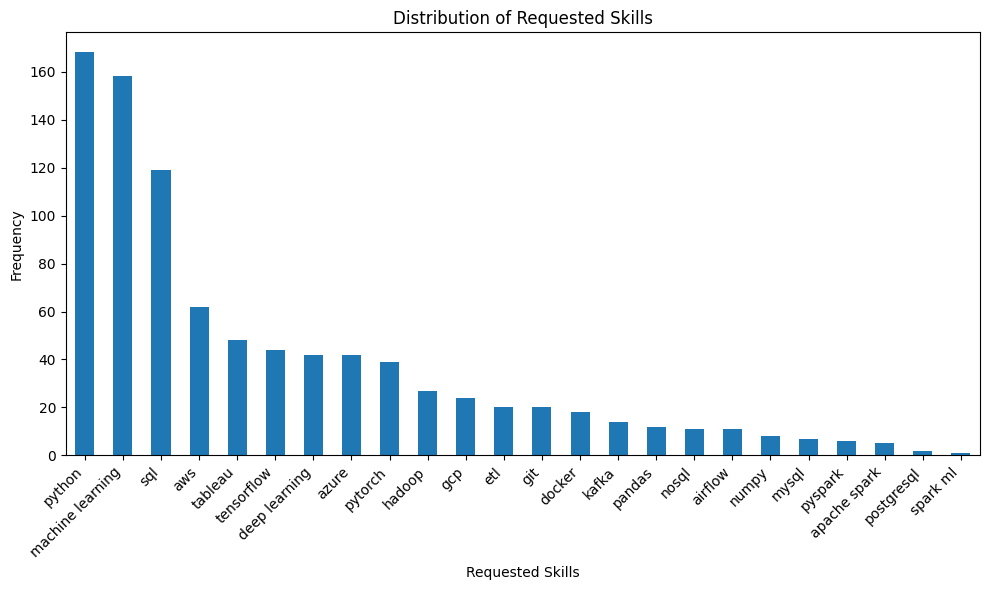

In [59]:
create_skills_dist_plot(df, skills_list)

## 5.2 Bivariate Analysis

### 5.2.1 Numerical vs categorical features

#### 5.2.1.1 Title vs. Salary

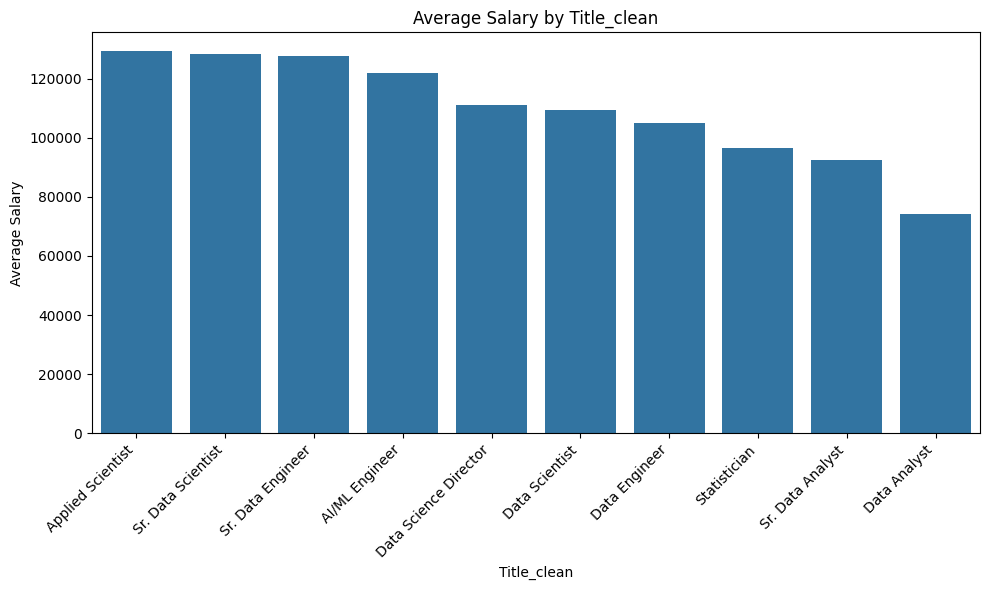

In [60]:
categorical_vs_salary_barplot(df, 'title_clean')

#### 5.2.1.2 Company vs. Salary

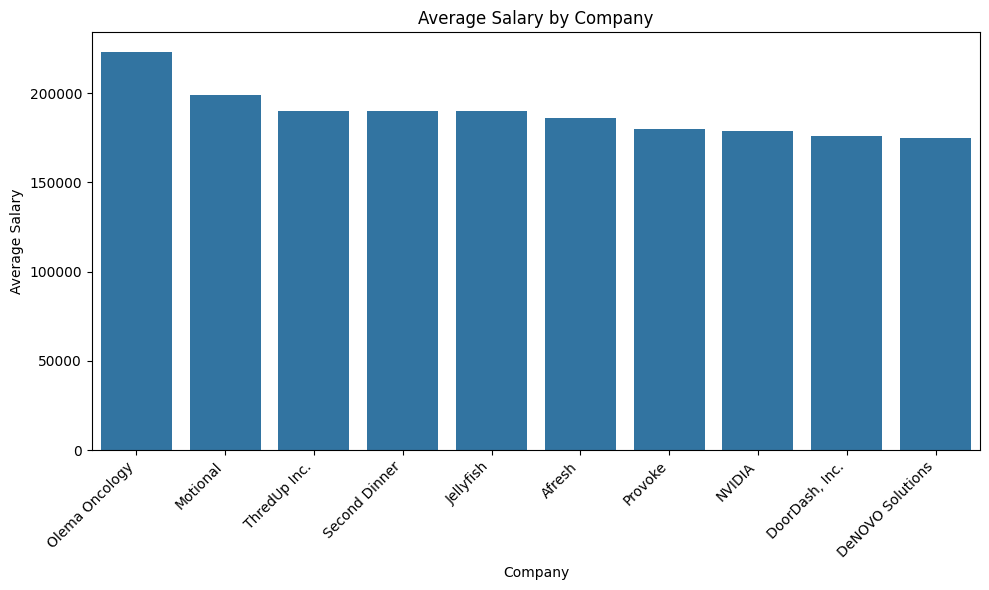

In [61]:
categorical_vs_salary_barplot(df, 'company')

#### 5.2.1.3 Location vs. Salary

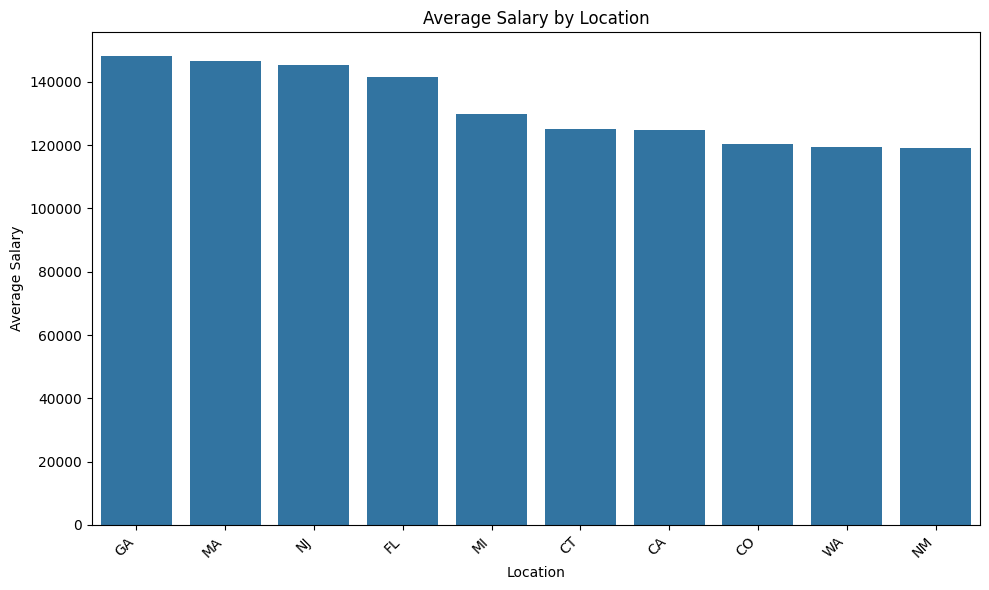

In [62]:
categorical_vs_salary_barplot(df, 'location')

### 5.2.3 Skills correlation with Salary

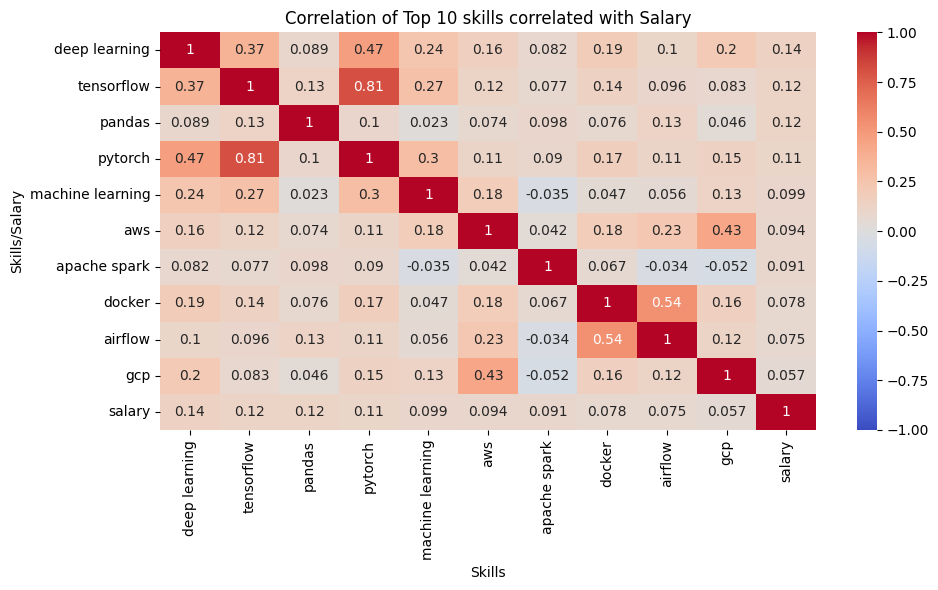

In [63]:
plot_top_skills_salary_correlation(df, skills_list)

# 6. Conclusion

This comprehensive analysis of the Artificial Intelligence and Machine Learning job market has provided valuable insights into the landscape of these fields. Through detailed exploratory data analysis (EDA), we examined the key characteristics of job postings, including job titles, salary distributions, and required skills. We identified distinct clusters of job titles using unsupervised learning techniques, which helped categorize and better understand the roles available in the industry.

Key findings include:

- Job Titles: 
    - A wide variety of roles exist, with some common ones being AI/ML Engineer, Data Scientist, and Data Engineer. The clustering approach highlighted how these titles can be grouped based on similarities in job descriptions.

- Salary Analysis: 
    - Salaries vary significantly across job titles and locations. Certain skills, particularly those related to advanced machine learning techniques and data engineering, are strongly correlated with higher salaries.
    
- Skills Analysis: 
    - The most in-demand skills include proficiency in Python, machine learning algorithms, and data visualization tools. The analysis also revealed the importance of soft skills like communication and problem-solving in these roles.
    
Overall, this analysis serves as a valuable resource for job seekers, employers, and educators in understanding the trends and requirements in the AI and ML job market. By identifying the key factors that influence job opportunities and salaries, stakeholders can make more informed decisions in career planning, hiring, and curriculum development.

The cleaned and processed dataset from this analysis is available for further exploration and can be a foundation for more detailed studies on specific roles or trends within the industry.